# Data Analysis on Football Results Dataset  
  

Dataset Link : [Kaggle](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017)

Football is the most popular sport in the world, and one of the oldest too. Having been around in various forms and under various names, it has become a global phenomenon in the past couple of centuries.  
  
This dataset has the results of 42,000 + international games, from the year 1872 to the present decade. Each record contains the date of the game, the names of the participant teams and the number of goals scored by each, whether it was a part of any tournament or a friendly, and where it took place.  

In [1]:
import pandas as pd
import numpy as np

In [2]:
import chart_studio.plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [3]:
df = pd.read_csv("results.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False


In [4]:
df.describe()

,home_score,away_score
count,42084.000000,42084.000000
mean,1.743632,1.186579
std,1.752441,1.403935
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [5]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## Adding a winner column

Though we have the scores available to us in the *home_score* and *away_score* columns, we do not have a column for the winner of each match. We are going to make this column for future analysis.  
  
**NOTE** : There is also the possibility of a draw. Matches in which both teams score the equal number of goals are counted as a draw with no winners. 

In [6]:
df['winner'] = 'Draw'
for index in df.index :
    if df.loc[index,'home_score'] > df.loc[index,'away_score']:
        df.loc[index,'winner'] = df.loc[index,'home_team']
    elif df.loc[index,'home_score'] < df.loc[index,'away_score']:
        df.loc[index,'winner'] = df.loc[index,'away_team']

In [7]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False,Hungary
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False,Albania
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False,Armenia
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False,North Macedonia


In [8]:
df['home_score']

0        0
1        4
2        2
3        2
4        3
        ..
42079    1
42080    0
42081    3
42082    1
42083    1
Name: home_score, Length: 42084, dtype: int64

In [9]:
df['winner'].describe()

count     42084
unique      301
top        Draw
freq       9700
Name: winner, dtype: object

In [10]:
df.count()

date          42084
home_team     42084
away_team     42084
home_score    42084
away_score    42084
tournament    42084
city          42084
country       42084
neutral       42084
winner        42084
dtype: int64

## Saving the modified dataframe as a separate .csv file

df.to_csv('results_with_winner.csv',header = False, index = False, encoding = 'utf-8')  
  
#Delete this comment, and change this to a code cell to make this work. The cell is markdown for now, because running this cell is optional. I don't want to run this cell everytime.

## In which Tournament was the highest number of games played?

In [11]:
tournament = df['tournament'].value_counts().reset_index()
tournament.columns = ['Tournament','No. of games played']
tournament

,Tournament,No. of games played
0,Friendly,17189
1,FIFA World Cup qualification,7365
2,UEFA Euro qualification,2582
3,African Cup of Nations qualification,1719
4,FIFA World Cup,900
...,...,...
107,OSN Cup,4
108,World Unity Cup,4
109,Atlantic Heritage Cup,2
110,Copa América qualification,2


In [12]:
tournament[:10]

,Tournament,No. of games played
0,Friendly,17189
1,FIFA World Cup qualification,7365
2,UEFA Euro qualification,2582
3,African Cup of Nations qualification,1719
4,FIFA World Cup,900
5,Copa América,813
6,AFC Asian Cup qualification,724
7,African Cup of Nations,690
8,CECAFA Cup,620
9,CFU Caribbean Cup qualification,606


We can see that there has been **111** recorded international tournaments(not including friendlies).  
  
Unsurprisingly, friendlies have been played more than any individual tournament. The FIFA World Cup qualification has seen the most games among tournaments. 

## Finding out the top 10 teams with most wins  
  
**Note** : Starting with index 1 as 'Draw' is counted as a team in the 'winner' column.

In [13]:
win_count = df['winner'].value_counts().reset_index()
win_count.columns = ['Team','Wins']
win_count

,Team,Wins
0,Draw,9700
1,Brazil,629
2,England,580
3,Germany,560
4,Argentina,529
...,...,...
296,Raetia,1
297,Republic of St. Pauli,1
298,Asturias,1
299,Timor-Leste,1


In [14]:
win_count[1:11]

,Team,Wins
1,Brazil,629
2,England,580
3,Germany,560
4,Argentina,529
5,Sweden,506
6,South Korea,455
7,Mexico,444
8,Hungary,442
9,Italy,431
10,France,425


The top spots go to traditional footballing powerhouses like **Brazil**, **England**, **Germany** and **Argentina**. The surprises here are **Sweden**, **Hungary** and **South Korea**.  
  
South Korea might be raking up wins as the top team in the comparitively weaker Asia region. Same can be presumed for Mexico, who are the dominant team in CONCAFAF(North and Central America). Hungary were once a top European team, but have fallen off in recent years. Sweden is an outlier here though.  
  
One issue with taking wins as the measure of a team's success is the fact that it favours the teams who have played the most matches, which will usually be the early adopters of the games. A better measure will be the **Winning %**.

## Adding Total Matches ,Wins and Win % columns

In [15]:
matches_played = pd.concat([df['home_team'],df['away_team']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played

,Team,Total Matches
0,Sweden,1030
1,England,1020
2,Brazil,985
3,Argentina,984
4,Germany,961
...,...,...
307,Palau,2
308,Niue,2
309,Madrid,1
310,Asturias,1


In [16]:
matches_played.head(10)

,Team,Total Matches
0,Sweden,1030
1,England,1020
2,Brazil,985
3,Argentina,984
4,Germany,961
5,Hungary,943
6,Uruguay,889
7,Mexico,876
8,South Korea,865
9,France,851


In [17]:
def wins_column(row):
    try:
        return int(win_count.loc[win_count.Team == row['Team']].Wins)
    except:
        return 0

In [18]:
matches_played['Wins'] = matches_played.apply(lambda row : wins_column(row), axis = 1)

In [19]:
matches_played

,Team,Total Matches,Wins
0,Sweden,1030,506
1,England,1020,580
2,Brazil,985,629
3,Argentina,984,529
4,Germany,961,560
...,...,...,...
307,Palau,2,0
308,Niue,2,0
309,Madrid,1,0
310,Asturias,1,1


In [20]:
matches_played['Win %'] = round(matches_played['Wins']/matches_played['Total Matches'],4) * 100

In [21]:
matches_played

,Team,Total Matches,Wins,Win %
0,Sweden,1030,506,49.13
1,England,1020,580,56.86
2,Brazil,985,629,63.86
3,Argentina,984,529,53.76
4,Germany,961,560,58.27
...,...,...,...,...
307,Palau,2,0,0.00
308,Niue,2,0,0.00
309,Madrid,1,0,0.00
310,Asturias,1,1,100.00


While judging teams based on their **Winning %**, we must put a lower limit on the number of games played (to avoid scenarios where a team who has played only a couple of games can have a 100% record). Here, we take the cut-off as 100 games.

## Teams in increasing order of Win % (minimum 100 games)

In [22]:
best_win_percentage = matches_played.loc[matches_played['Total Matches'] > 99].sort_values('Win %',ascending = False)

In [23]:
best_win_percentage.reset_index(drop = True,inplace =True)

In [24]:
best_win_percentage[:10]

,Team,Total Matches,Wins,Win %
0,Brazil,985,629,63.86
1,Spain,705,411,58.30
2,Germany,961,560,58.27
3,England,1020,580,56.86
4,Iran,502,275,54.78
5,Czech Republic,308,166,53.90
6,Argentina,984,529,53.76
7,Italy,812,431,53.08
8,Croatia,329,174,52.89
9,New Caledonia,227,120,52.86


Now we get a more clearer picture of the best performing teams. Here too, there are a few surprises. **Iran** isn't one of the best teams internationally, but being one of the top Asian teams means that they win quite a few games played in that region. **Czech Republic** and **Croatia** are two teams which aren't necessarily considered as amongst the very best, but are quite successful and are considered a tricky opposition.  
  
**New Caledonia** is easily the biggest surprise. An unheard-of team with a [FIFA Ranking](https://www.fifa.com/fifa-world-ranking/associations/association/ncl/men/) as low as 157, how did they make it here?  
  
According to [Wikipedia](https://en.wikipedia.org/wiki/New_Caledonia), "New Caledonia is a special collectivity of France in the southwest Pacific Ocean, south of Vanuatu, about 1,210 km (750 mi) east of Australia and 17,000 km (11,000 mi) from Metropolitan France."  
  
They are a tiny French Overseas Territory which has played a majority of its games against even smaller teams from Oceania. The lack of quality opposition seems to have highly inflated their winning rate. But as winning % assumes every opposition as equal, New Caledonia deserve their place in the top 10, I guess...  
  
[Wikipedia link to North Caledonia Men's National Team](https://en.wikipedia.org/wiki/New_Caledonia_national_football_team)

## Adding Total Goals Scored, and Goals Per Game

In [25]:
def total_goals_scored(row):
    return int(df[df['home_team'] == row['Team']]['home_score'].sum()) + int(df[df['away_team'] == row['Team']]['away_score'].sum())

In [26]:
best_win_percentage['Goals scored'] = best_win_percentage.apply(lambda row : total_goals_scored(row), axis = 1)
best_win_percentage['Goals per match'] = round((best_win_percentage['Goals scored']/best_win_percentage['Total Matches']),2)

In [27]:
best_win_percentage

,Team,Total Matches,Wins,Win %,Goals scored,Goals per match
0,Brazil,985,629,63.86,2161,2.19
1,Spain,705,411,58.30,1420,2.01
2,Germany,961,560,58.27,2144,2.23
3,England,1020,580,56.86,2230,2.19
4,Iran,502,275,54.78,932,1.86
...,...,...,...,...,...,...
190,Somalia,107,10,9.35,56,0.52
191,Luxembourg,413,38,9.20,254,0.62
192,Liechtenstein,207,17,8.21,93,0.45
193,Andorra,175,6,3.43,48,0.27


In [28]:
best_win_percentage.sort_values('Goals per match',ascending = False).reset_index(drop = True)[:10]

,Team,Total Matches,Wins,Win %,Goals scored,Goals per match
0,New Caledonia,227,120,52.86,614,2.70
1,Tahiti,210,109,51.90,564,2.69
2,Papua New Guinea,116,35,30.17,280,2.41
3,Fiji,221,97,43.89,523,2.37
4,Solomon Islands,170,72,42.35,383,2.25
5,Germany,961,560,58.27,2144,2.23
6,Brazil,985,629,63.86,2161,2.19
7,England,1020,580,56.86,2230,2.19
8,Netherlands,796,404,50.75,1640,2.06
9,Hungary,943,442,46.87,1920,2.04


In [29]:
best_win_percentage.head(10)

,Team,Total Matches,Wins,Win %,Goals scored,Goals per match
0,Brazil,985,629,63.86,2161,2.19
1,Spain,705,411,58.30,1420,2.01
2,Germany,961,560,58.27,2144,2.23
3,England,1020,580,56.86,2230,2.19
4,Iran,502,275,54.78,932,1.86
5,Czech Republic,308,166,53.90,551,1.79
6,Argentina,984,529,53.76,1836,1.87
7,Italy,812,431,53.08,1393,1.72
8,Croatia,329,174,52.89,573,1.74
9,New Caledonia,227,120,52.86,614,2.70


In [30]:
best_win_percentage.tail(10)

,Team,Total Matches,Wins,Win %,Goals scored,Goals per match
185,Nicaragua,159,28,17.61,144,0.91
186,Aruba,122,21,17.21,154,1.26
187,Macau,128,21,16.41,107,0.84
188,Malta,408,51,12.50,257,0.63
189,Seychelles,113,13,11.50,76,0.67
190,Somalia,107,10,9.35,56,0.52
191,Luxembourg,413,38,9.20,254,0.62
192,Liechtenstein,207,17,8.21,93,0.45
193,Andorra,175,6,3.43,48,0.27
194,San Marino,172,1,0.58,24,0.14


From the above data, it seems that the best teams score more goals than the worst teams. Is it a fair statement, or is it more random? Let's attempt to find out.

## Plotting a Line Graph between the teams(in order of Win %) and Goals per game

In [31]:
%matplotlib inline

Text(0, 0.5, 'Goals per game')

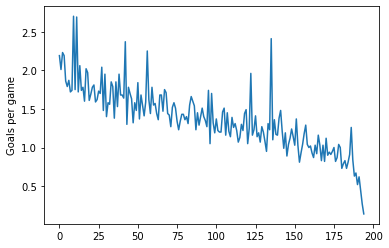

In [32]:
best_win_percentage.plot(y = 'Goals per match',kind = 'line',legend = False).set_ylabel('Goals per game')

Except for some outliers, we can see a general pattern - more successful teams tend to score more goals per match, which is a logical assumption.

In [33]:
best_gpm = best_win_percentage.sort_values('Goals per match',ascending = False)[:10]

In [34]:
best_gpm.reset_index(drop = True, inplace = True)

In [35]:
trace = [go.Table(
    header=dict(values=["Team","Total Matches","Goals Per Match"],
                fill = dict(color='#ff96ea'),
                font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                align = ['center'],
               height = 30),
    cells=dict(values=[best_gpm['Team'], best_gpm['Total Matches'], best_gpm['Goals per match']],
               fill = dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']),
               align = ['center'], font_size=13, height=25))]

layout = dict(
    width=750,
    height=500,
    autosize=False,
    title='Top 10 Teams with the best Goals Per Match ratio',
    margin = dict(t=100),
    showlegend=False,    
)

fig1 = dict(data=trace, layout=layout)
iplot(fig1)

## Checking for correlation between attributes in the best_win_percentage DataFrame

As the name suggests, correlation indicates how closely related two attributes are. Correlation can be weak or strong, and positive or negative.  
  
In pandas, [corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) is the function used to find out correlation.  
  
Let's test out corr() on the dataframe.

In [36]:
best_win_percentage.corr()

,Total Matches,Wins,Win %,Goals scored,Goals per match
Total Matches,1.000000,0.947258,0.595037,0.947557,0.425791
Wins,0.947258,1.000000,0.761556,0.986651,0.591201
Win %,0.595037,0.761556,1.000000,0.733518,0.861200
Goals scored,0.947557,0.986651,0.733518,1.000000,0.630256
Goals per match,0.425791,0.591201,0.861200,0.630256,1.000000


By default, **corr()** gives us the correlation between every attribute of the dataframe. The values range from -1 to 1, with the extremes signifying strong correlation(either positive or negative), while values close to 0 indicate weak correlation.  
  
By default, the **Pearson** method is used to find out the correlation. Other methods are **Kendall**, and **Spearman** method.  
  
Let's test the correlation between **Win %** and **Goals per match** using the mentioned methods.

In [37]:
best_win_percentage[['Win %','Goals per match']].corr()

,Win %,Goals per match
Win %,1.0000,0.8612
Goals per match,0.8612,1.0000


In [38]:
best_win_percentage[['Win %','Goals per match']].corr(method = 'kendall')

,Win %,Goals per match
Win %,1.000000,0.716461
Goals per match,0.716461,1.000000


In [39]:
best_win_percentage[['Win %','Goals per match']].corr(method = 'spearman')

,Win %,Goals per match
Win %,1.000000,0.882356
Goals per match,0.882356,1.000000


We get 3 values - **0.8612**,**0.716461**, and **0.882356** for the correlation between the attributes. As the values are greater than zero and are close to 1, we can identify a **fairly strong correlation** between them. So there does exist a correlation between winning more % of games, and scoring more goals per match.

### On the basis of the analysis done above, we can generally say that the teams with a better winning % do tend to score more goals per game.

## Making a Simple Linear Regression Model

**Linear Regression** is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range.  
  
Here we are using the *Win %* to predict the *Goals per match* ratio. Then we compare the predicted values to the actual values available to us, and check whether the general pattern is the same or not.  
  
As we are only using 2 variables here, it is a **Simple Linear Regression Model**.

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
x = best_win_percentage[['Win %']]
y = best_win_percentage[['Goals per match']]
regressor = LinearRegression()

In [42]:
regressor.fit(x, y)

LinearRegression()

In [43]:
y_pred = regressor.predict(x)

In [44]:
y_pred

array([[2.27008442],
       [2.09584935],
       [2.09490924],
       [2.05072373],
       [1.98554226],
       [1.95796549],
       [1.95357828],
       [1.93226895],
       [1.92631488],
       [1.92537476],
       [1.91722708],
       [1.89529101],
       [1.86896773],
       [1.85925318],
       [1.85705957],
       [1.83387002],
       [1.82760257],
       [1.82666245],
       [1.80848685],
       [1.80127928],
       [1.79062462],
       [1.78373043],
       [1.77777635],
       [1.77088216],
       [1.76304785],
       [1.75646703],
       [1.74111178],
       [1.73766468],
       [1.72230944],
       [1.72168269],
       [1.71666873],
       [1.71071466],
       [1.70350709],
       [1.70162686],
       [1.684078  ],
       [1.67781055],
       [1.6749902 ],
       [1.66057507],
       [1.6568146 ],
       [1.65650123],
       [1.64521982],
       [1.6442797 ],
       [1.6442797 ],
       [1.64145935],
       [1.64051924],
       [1.63205818],
       [1.6295512 ],
       [1.626

We see that y_pred is an array. The values are the predicted values for *Goals per match*, predicted using the *Win %* given to it. Let's compare these values to the actual values, which we have stored in y.

In [45]:
import matplotlib.pyplot as plt

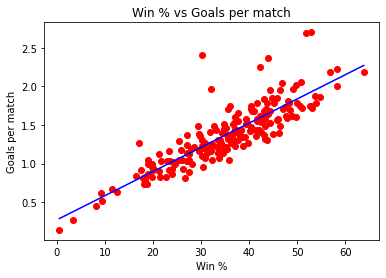

In [46]:
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'blue')
plt.title('Win % vs Goals per match')
plt.xlabel('Win %')
plt.ylabel('Goals per match')
plt.show()

The blue line is the predicted value. We can see that although there are some outliers and a bit of variance, the general pattern is the same. The prediction model, which is admittedly very basic and limited, has done a fairly decent job.  
  
Now let's use an inbuilt LinearRegression Model method to estimate the accuracy of this model.

In [47]:
regressor.score(x,y)

0.741664735342952

The *score()* method for a LinearRegression() object gives the the coefficient of determination(R<sup>2</sup>) of the prediction. [For more about R<sup>2</sup>, click here](https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/)  
  
The score value ranges from 0 to 1, with 1 being the best. The score gives an idea of how many data points fall within the results of the line formed by the regression equation. The higher the coefficient, the higher percentage of points the line passes through when the data points and line are plotted.  
  
A score of 0.7416 means that this model is fairly accurate.

**The Data Analysis ends here.**  
  
The following steps are done to find out the dependencies used, in order to create an interactive Binder file.

In [48]:
%load_ext watermark

In [49]:
%watermark --iversions

numpy       : 1.20.2
plotly      : 4.14.3
matplotlib  : 3.4.2
pandas      : 1.2.3
chart_studio: 1.1.0

